In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import io

In [27]:
# dataset path
data_root = '/home/hero/Data/heat_layout_data/200x200_0.045_0.055/simple_component/FDM'
train_list = '/home/hero/Data/heat_layout_data/train.txt'

nse_geom_path = '/home/hero/Data/heat_layout_data/200x200_0.045_0.055/nse_geom'

In [28]:
mat1 = os.listdir(data_root + '/train')[0]
mat_file = io.loadmat(data_root + '/train/' + mat1)

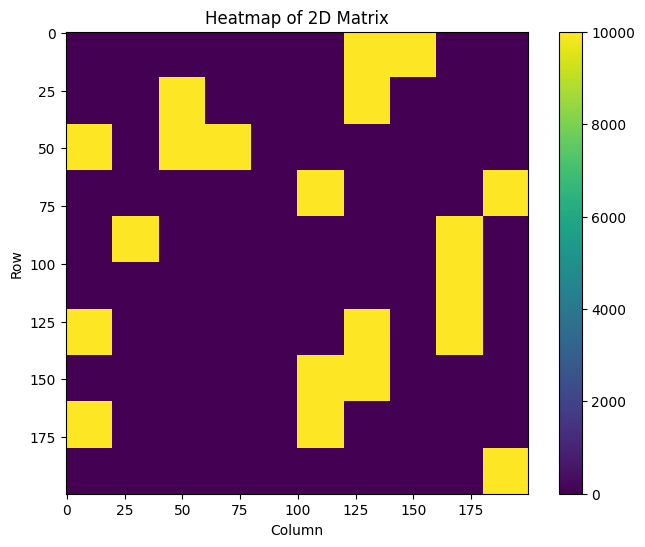

In [29]:
matrix = mat_file['F']
# 히트맵 그리기 함수
def plot_heatmap(matrix):
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()  # 색상 막대 추가
    plt.title('Heatmap of 2D Matrix')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.show()

# 히트맵 그리기
plot_heatmap(matrix)

In [30]:
# make geometry
'''
0: non-slip
1: interior
2: inlet
3: outlet
'''

'\n0: non-slip\n1: interior\n2: inlet\n3: outlet\n'

In [50]:
def make_nse_geom(mat_file):
    geom = mat_file['F']
    # 0보다 큰 모든 수를 1로 변환
    geom[geom > 0] = -1
    geom = geom + 1 
    geom[0,:] = 0
    geom[-1,:] = 0
    
    # non slip,interior
    geom[:,0] = 2
    geom[:,-1] = 3

    mat_file['F'] = geom

    # 배열을 수직으로 스택
    nse_arr = np.stack((geom, geom, geom), axis=0)

    # inlet
    index = np.where(geom==2)
    nse_arr[0,index[0],index[1]] = 3
    nse_arr[1,index[0],index[1]] = 0
    nse_arr[2,index[0],index[1]] = 1

    # outlet
    index = np.where(geom==3)
    nse_arr[0,index[0],index[1]] = 1
    nse_arr[1,index[0],index[1]] = 1
    nse_arr[2,index[0],index[1]] = 0

    mat_file['u'] = nse_arr
    
    return mat_file

In [51]:
mat_nse = make_nse_geom(mat_file)

/tmp/ipykernel_3046/2675486493.py:4: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint16 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  geom[geom > 0] = -1


In [55]:
for mat1 in os.listdir(data_root + '/train'):
    mat_file = io.loadmat(data_root + '/train/' + mat1)
    mat_nse = make_nse_geom(mat_file)

    io.savemat(nse_geom_path + '/train/' + mat1,mat_nse)

/tmp/ipykernel_3046/2675486493.py:4: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint16 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  geom[geom > 0] = -1
